In [8]:
import pandas as pd
import numpy as np

agg_data = pd.read_csv("agg_data5.csv")
agg_data.head()

,pdf,project_name,country,multiple_phases,number_countries,eval_year,number_sectors,number_subsectors,mean_investment,number_funding_source,...,count_dominieren_die,count_unzureichend,count_geringen,count_maengel,count_nicht_erfolgreich,count_nicht_erfolgreiche,count_ueberwiegend_nicht,count_auch_nicht,count_ueberwiegend_nicht_erfolgreich,count_vorhaben_ist_nutzlos
0,%C3%84gypten_Qena_2022_D.pdf,Kommunale Wasserver- und Abwasserentsorgung Qena,Egypt,0,1,2022,1,1,12670000.0,1,...,2,4,7,3,9,4,2,1,2,1
1,%C3%84gypten_Umwelt_2022_D.pdf,Förderung von Umweltschutzmaßnahmen der privat...,Egypt,0,1,2022,1,1,25780000.0,1,...,2,6,5,1,6,3,2,1,2,1
2,%C3%84thiopien_Gavi_2022_D.pdf,Impfprogrammförderung in Äthiopien in Zusammen...,Ethiopia,0,1,2022,1,1,10000000.0,1,...,0,1,0,1,3,1,0,2,0,0
3,Afrika_TCX_2012_D.pdf,Lokalwährungsfonds TCX,Afrika (regional),0,1,2012,1,1,90000000.0,1,...,2,1,0,1,2,2,0,1,0,1
4,Albanien_Elbasan_2011.pdf,Wirtschaftsförderung durch Ausbau kommunaler I...,Albania,0,1,2011,1,1,10600000.0,1,...,2,3,0,1,2,2,0,2,0,1


In [9]:
validation_data = agg_data.sample(frac=0.1, random_state = 123)
train_test_data = agg_data.drop(validation_data.index)
train_test_data.shape, validation_data.shape

# count Nan values in the columns
print(train_test_data.isnull().sum()[train_test_data.isnull().sum() != 0])
# drop some rows with 1 Nan values in the columns
train_test_data = train_test_data.dropna(subset=["efficiency", "effectivity", "relevance"])

country                   17
mean_investment            1
relevance                  1
coherence                576
effectivity                1
efficiency                 1
sustainability             5
invest_plan_vs_actual    207
dtype: int64


In [10]:
# Define FEATURES and TARGET
FEATURES = ['eval_year', 'efficiency', 'effectivity', 'relevance', 'cluster', 'outcome_fully', 'outcome_partially', 'outcome_not',
             'multiple_phases', 'number_countries', 'number_sectors', 'number_subsectors', 
            'number_carrier_type', 'adaptive_management', 'word_count', 'character_count', 'word_density', 
            'count_deutlich', 'count_gut', 'count_erreicht', 'count_erfolgreich', 'count_verbesserungen', 
            'count_erfuellt', 'count_umsetzung', 'count_zutreffend', 'count_verbesserung_der', 'count_beitrag_zur', 
            'count_mit_hoher_wahrscheinlichkeit', 'count_deutlich_ueber_den', 'count_gute', 'count_teilweise', 
            'count_allerdings', 'count_positiv', 'count_positive', 'count_positiver', 'count_wirksamkeit_des_vorhabens', 
            'count_bisher_positive', 'count_positive_entwicklungspolitische_wirksamkeit', 'count_unter_den_erwartungen', 
            'count_die_negativen_ergebnisse', 'count_dominieren_die', 'count_unzureichend', 'count_geringen', 
            'count_maengel', 'count_nicht_erfolgreich', 'count_nicht_erfolgreiche', 'count_ueberwiegend_nicht', 
            'count_auch_nicht', 'count_ueberwiegend_nicht_erfolgreich', 'count_vorhaben_ist_nutzlos']

# Add secondary features
top_secondary_features=['wbgi_gee', 'wdi_expedus', 'wdi_gdpind', 'gpi_ss', 'bci_bcistd']
FEATURES.extend(top_secondary_features)

TARGET = 'overall_rating'

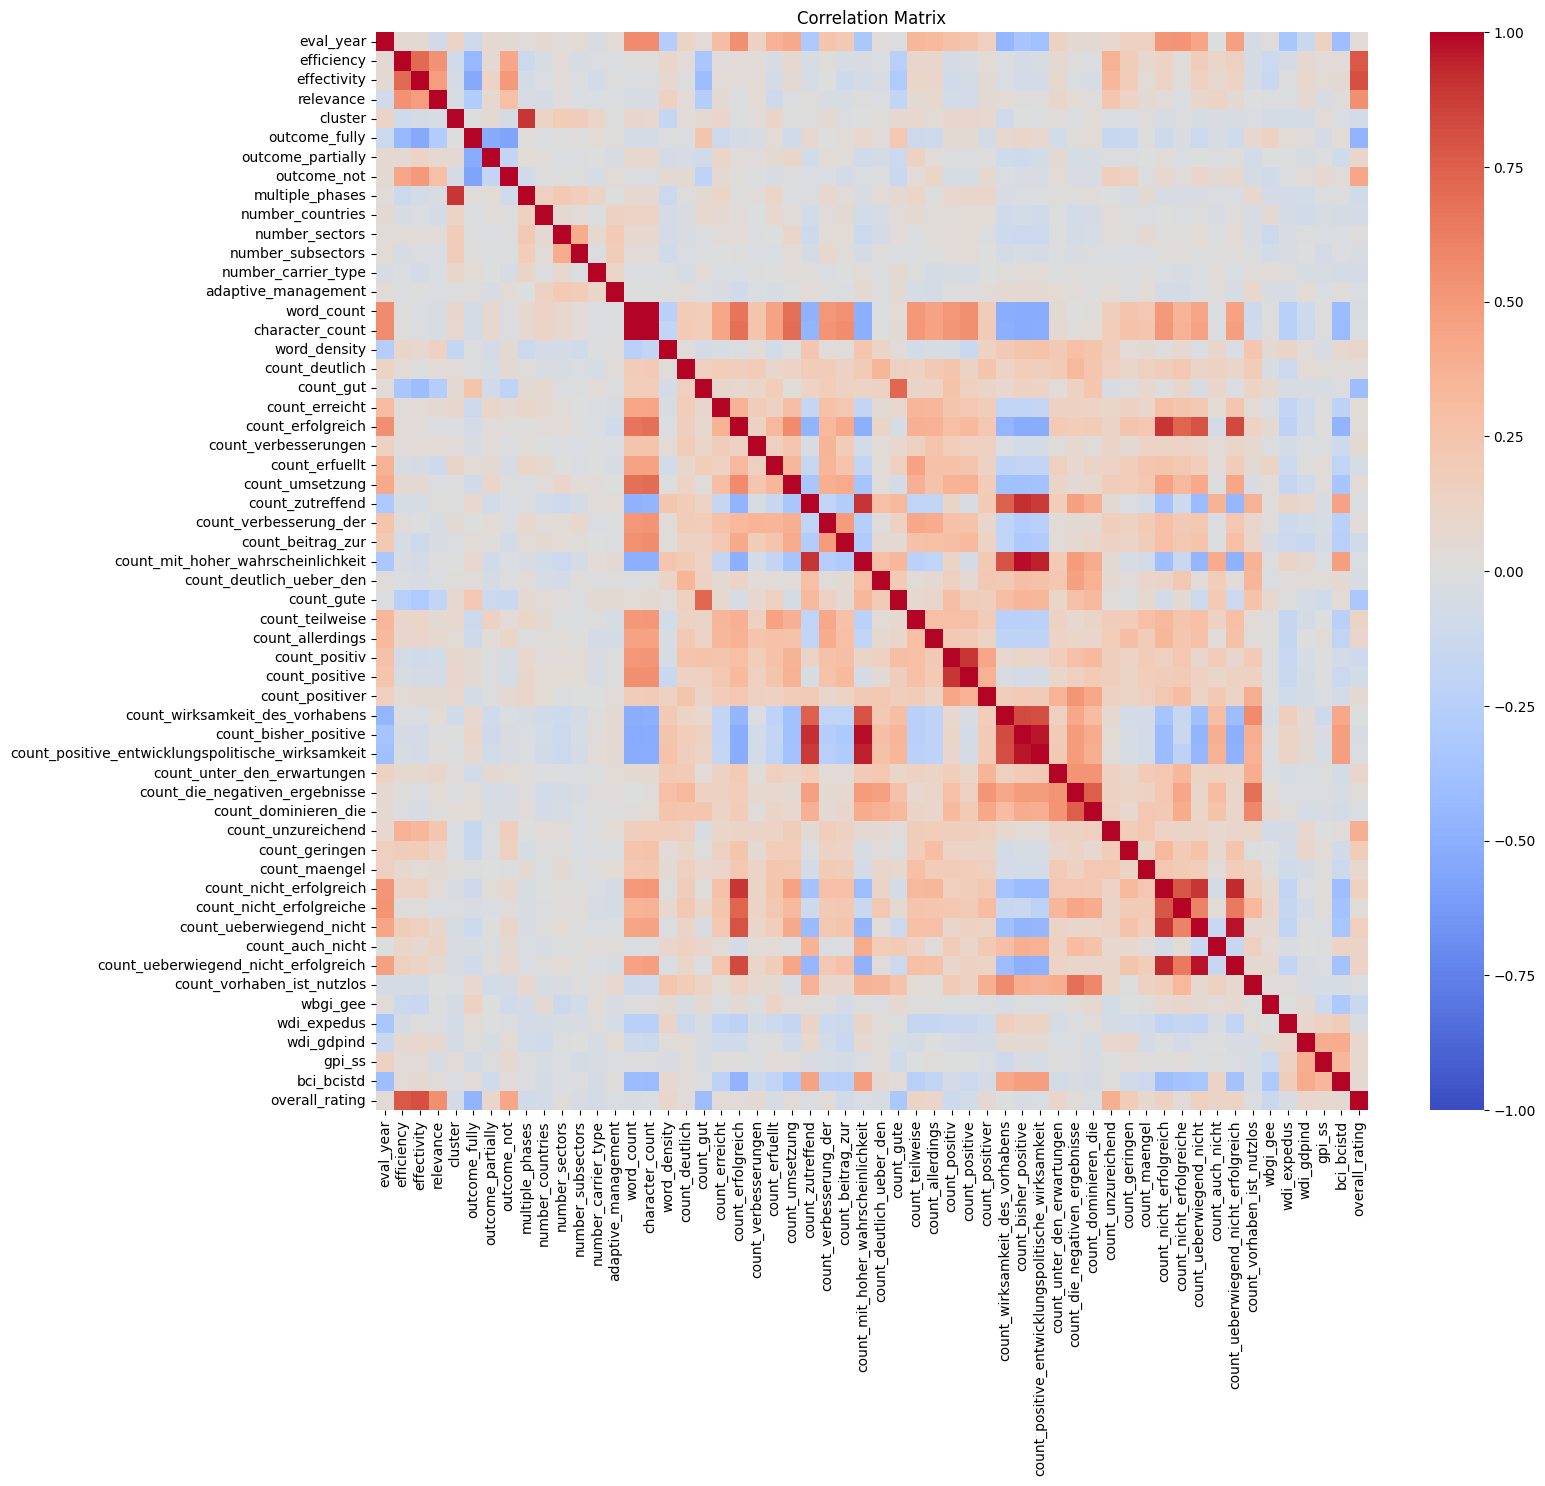

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = FEATURES + [TARGET]
corr_matrix = agg_data[selected_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

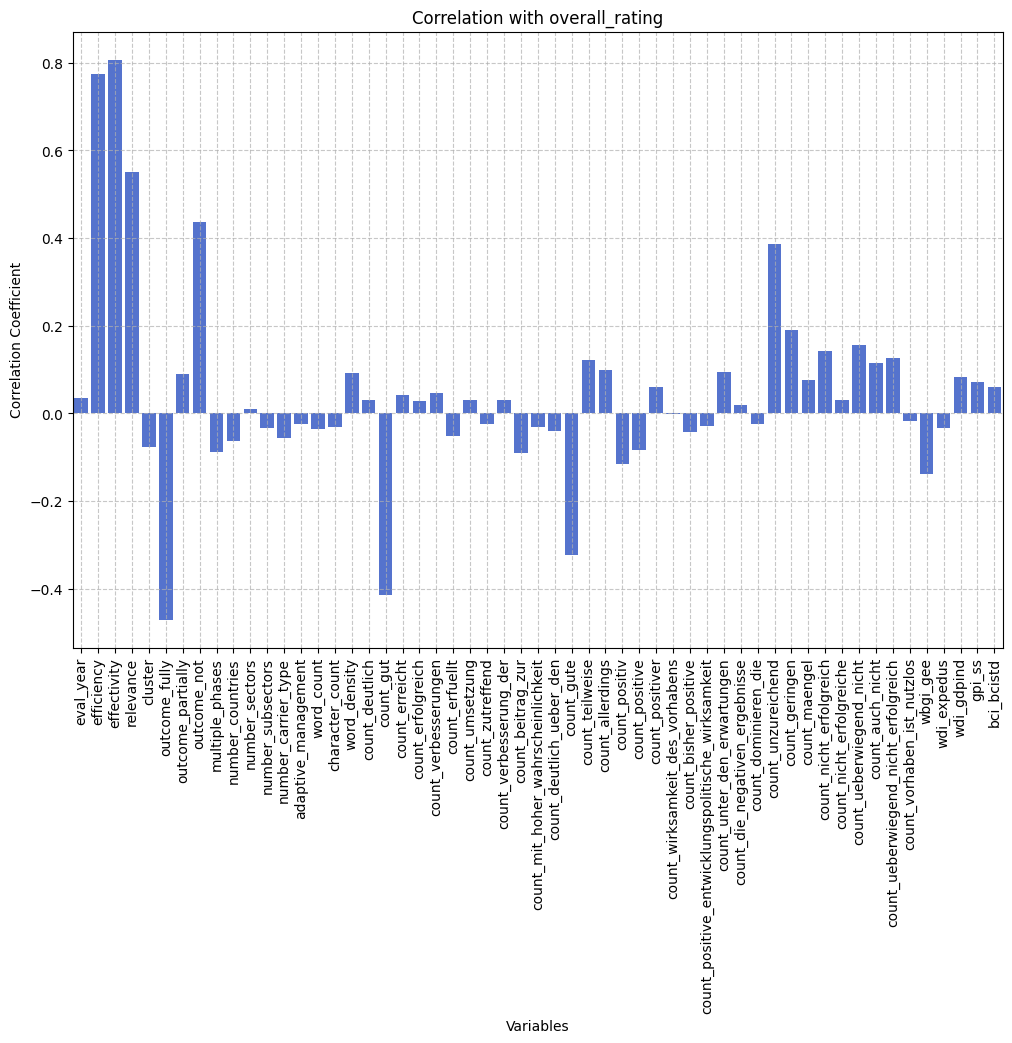

In [12]:
# Compute the correlation matrix
corr_matrix = agg_data[FEATURES + [TARGET]].corr()

# Extract the correlations with the TARGET variable
target_corr = corr_matrix[TARGET].drop(TARGET)

# Plot the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=target_corr.index, y=target_corr.values, color='royalblue')  # Use color instead of palette
plt.title(f'Correlation with {TARGET}')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Add a light grid
plt.grid(True, linestyle='--', alpha=0.7)  # Light dashed grid

plt.show()

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

X = train_test_data[FEATURES]
y = train_test_data[TARGET]

# Initialize the regression model
model = LinearRegression()

# Perform cross-validation and calculate RMSE for each fold
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

# Calculate the average RMSE
average_rmse = rmse_scores.mean()

# Output the RMSE scores and the average RMSE
print(f"RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE: {average_rmse}")


RMSE scores for each fold: [0.45069739 0.47616855 0.54909612 0.42960508 0.43447109 0.33044875
 0.40276649 0.63815023 0.45128772 0.55851569]
Average RMSE: 0.4721207125665745


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb

# Definiere die Hyperparameter-Raster für jedes Modell
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'ridge__alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'lasso__alpha': [0.1, 1.0, 10.0]},
    'Random Forest': {'randomforestregressor__n_estimators': [100, 200],
                      'randomforestregressor__max_depth': [None, 10, 20]},
    'Gradient Boosting': {'gradientboostingregressor__n_estimators': [100, 200],
                          'gradientboostingregressor__learning_rate': [0.01, 0.1]},
    'Support Vector Regression': {'svr__C': [0.1, 1.0, 10.0],
                                  'svr__gamma': ['scale', 'auto']},
    'XGBoost': {'xgbregressor__n_estimators': [100, 200],
                'xgbregressor__learning_rate': [0.01, 0.1]},
    'LightGBM': {'lgbmregressor__n_estimators': [100, 200],
                 'lgbmregressor__learning_rate': [0.01, 0.1]}
}

# Definiere die Modelle mit Pipelines, um ggf. Standardisierung anzuwenden
models = {
    'Linear Regression': Pipeline([('linear', LinearRegression())]),
    'Ridge Regression': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
    'Lasso Regression': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())]),
    'Random Forest': Pipeline([('randomforestregressor', RandomForestRegressor())]),
    'Gradient Boosting': Pipeline([('gradientboostingregressor', GradientBoostingRegressor())]),
    'Support Vector Regression': Pipeline([('scaler', StandardScaler()), ('svr', SVR())]),
    'XGBoost': Pipeline([('xgbregressor', xgb.XGBRegressor())]),
    'LightGBM': Pipeline([('lgbmregressor', lgb.LGBMRegressor())])
}

# Definiere die Features und das Ziel
X = train_test_data[FEATURES]
y = train_test_data[TARGET]

# Speichere die RMSE-Ergebnisse
rmse_results = {}

# Berechne die RMSE für jedes Modell
for name, pipeline in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    neg_mse_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=10)
    rmse_scores = np.sqrt(-neg_mse_scores)
    average_rmse = rmse_scores.mean()
    
    rmse_results[name] = average_rmse
    
    print(f"{name} RMSE scores for each fold: {rmse_scores}")
    print(f"{name} Average RMSE: {average_rmse}")

# Ausgabe der Ergebnisse
print("\nModel comparison based on RMSE:")
for model_name, rmse in rmse_results.items():
    print(f"{model_name}: {rmse}")


Linear Regression RMSE scores for each fold: [0.45069739 0.47616855 0.54909612 0.42960508 0.43447109 0.33044875
 0.40276649 0.63815023 0.45128772 0.55851569]
Linear Regression Average RMSE: 0.4721207125665745
Ridge Regression RMSE scores for each fold: [0.44453832 0.47344527 0.52545277 0.42792797 0.42958953 0.32733122
 0.39995376 0.63502335 0.44616803 0.55689452]
Ridge Regression Average RMSE: 0.46663247476726666
Lasso Regression RMSE scores for each fold: [0.43747709 0.48103233 0.46315394 0.46236657 0.43449909 0.37094497
 0.42352829 0.56522119 0.40683189 0.56932838]
Lasso Regression Average RMSE: 0.4614383742216395
Random Forest RMSE scores for each fold: [0.47037015 0.45229644 0.45113158 0.43941497 0.40141713 0.29203948
 0.42078104 0.56420023 0.41414544 0.49252752]
Random Forest Average RMSE: 0.4398323970209936
Gradient Boosting RMSE scores for each fold: [0.47033127 0.44327485 0.4618972  0.42411141 0.37958116 0.3109142
 0.43554991 0.56013622 0.38880039 0.491757  ]
Gradient Boosting 